In [106]:
#Import All Required Libraries

import pandas as pd
import matplotlib as plt
import seaborn as sns
import numpy as np
from sklearn import svm
import matplotlib.pyplot as py
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score, classification_report
from sklearn.preprocessing import StandardScaler,MinMaxScaler


#Loading Train-Test Dataframes

train_df = pd.read_csv(r'train.csv')
test_df = pd.read_csv(r'test.csv')

train_df

,player_id,name,age,gender,country,height,weight,ball_controlling_skills,body_reflexes,body_balance,...,strong_foot,behaviour_rating,matches_played,fitness_rating,trophies_won,dedication_level,coaching,years_of_experience,no_of_disqualifications,selection
0,PLID_4964,Keva Horan,23,M,Ukraine,6'2,176lbs,77.0,58.0,47.0,...,Right,7.7,NaN,8.1,2.0,High,Talent Hunt,8.0,0.0,1
1,PLID_11234,Herma Tann,18,M,Russia,5'10,148lbs,54.0,69.0,70.0,...,Any,5.3,0.0,NaN,3.0,Medium,Source,3.0,0.0,0
2,PLID_19127,Eilene Kizer,16,F,Spain,6'2,172lbs,34.0,43.0,45.0,...,Left,4.7,0.0,6.6,5.0,Low,Academy,2.0,0.0,1
3,PLID_17467,Andrea Badgett,27,M,Chile,5'11,165lbs,79.0,73.0,76.0,...,Right,8.6,113.0,8.6,6.0,Medium,Academy,13.0,16.0,1
4,PLID_9661,Jeremiah Bumbalough,19,F,Argentina,5'8,158lbs,47.0,61.0,74.0,...,Right,NaN,0.0,5.7,5.0,Medium,Academy,4.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13989,PLID_10956,Viva Stepney,20,M,Uruguay,6'0,161lbs,60.0,48.0,62.0,...,Right,6.0,NaN,7.6,2.0,Medium,Academy,6.0,0.0,1
13990,PLID_17290,Illa Pitre,18,F,England,5'10,165lbs,53.0,68.0,59.0,...,Right,5.3,0.0,5.6,3.0,Medium,Academy,4.0,0.0,0
13991,PLID_5193,Marylouise Mosley,17,M,Japan,6'0,172lbs,56.0,73.0,62.0,...,Left,5.7,0.0,7.7,3.0,Low,Talent Hunt,2.0,0.0,1
13992,PLID_12173,Teri Escamilla,20,F,Ukraine,5'10,150lbs,71.0,69.0,70.0,...,Left,6.8,1.0,5.8,4.0,Medium,Academy,6.0,0.0,1


In [148]:
# Considering these two sets  and take test set given as validations et

In [108]:
# Here we can see some NaN values which will be taken care of later. For now we will work on our train_df only and know stats and start preprocessing

#Divide this into main basic components
#1. EDA
#2. Data Preprocessing
#3. Feature Selection and Engineering
#4. Normalization and Standardization
#5. Modelling
#6. Evaluation Metric

In [109]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13994 entries, 0 to 13993
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   player_id                  13994 non-null  object 
 1   name                       13994 non-null  object 
 2   age                        13994 non-null  int64  
 3   gender                     13975 non-null  object 
 4   country                    13994 non-null  object 
 5   height                     13994 non-null  object 
 6   weight                     13577 non-null  object 
 7   ball_controlling_skills    13581 non-null  float64
 8   body_reflexes              13994 non-null  float64
 9   body_balance               13994 non-null  float64
 10  jumping_skills             13970 non-null  float64
 11  penalties_conversion_rate  13964 non-null  float64
 12  mental_strength            13966 non-null  float64
 13  goalkeeping_skills         13994 non-null  flo

In [110]:
#We will check the shape of the data

train_df.shape

(13994, 30)

In [111]:
#Check if null values in the columns.

train_df.isnull().sum()

player_id                      0
name                           0
age                            0
gender                        19
country                        0
height                         0
weight                       417
ball_controlling_skills      413
body_reflexes                  0
body_balance                   0
jumping_skills                24
penalties_conversion_rate     30
mental_strength               28
goalkeeping_skills             0
defending_skills               0
passing_skills                 0
dribbling_skills               0
shot_accuracy                572
body_strength_stamina          0
max_running_speed              0
strong_foot                  552
behaviour_rating             703
matches_played               666
fitness_rating               695
trophies_won                   0
dedication_level               0
coaching                     125
years_of_experience          144
no_of_disqualifications        0
selection                      0
dtype: int

In [112]:
train_df.head()

,player_id,name,age,gender,country,height,weight,ball_controlling_skills,body_reflexes,body_balance,...,strong_foot,behaviour_rating,matches_played,fitness_rating,trophies_won,dedication_level,coaching,years_of_experience,no_of_disqualifications,selection
0,PLID_4964,Keva Horan,23,M,Ukraine,6'2,176lbs,77.0,58.0,47.0,...,Right,7.7,NaN,8.1,2.0,High,Talent Hunt,8.0,0.0,1
1,PLID_11234,Herma Tann,18,M,Russia,5'10,148lbs,54.0,69.0,70.0,...,Any,5.3,0.0,NaN,3.0,Medium,Source,3.0,0.0,0
2,PLID_19127,Eilene Kizer,16,F,Spain,6'2,172lbs,34.0,43.0,45.0,...,Left,4.7,0.0,6.6,5.0,Low,Academy,2.0,0.0,1
3,PLID_17467,Andrea Badgett,27,M,Chile,5'11,165lbs,79.0,73.0,76.0,...,Right,8.6,113.0,8.6,6.0,Medium,Academy,13.0,16.0,1
4,PLID_9661,Jeremiah Bumbalough,19,F,Argentina,5'8,158lbs,47.0,61.0,74.0,...,Right,NaN,0.0,5.7,5.0,Medium,Academy,4.0,0.0,0


In [113]:
# Checking Categorigcal or Numerical Value Datatypes of features
train_df.dtypes

player_id                     object
name                          object
age                            int64
gender                        object
country                       object
height                        object
weight                        object
ball_controlling_skills      float64
body_reflexes                float64
body_balance                 float64
jumping_skills               float64
penalties_conversion_rate    float64
mental_strength              float64
goalkeeping_skills           float64
defending_skills             float64
passing_skills               float64
dribbling_skills             float64
shot_accuracy                float64
body_strength_stamina        float64
max_running_speed            float64
strong_foot                   object
behaviour_rating             float64
matches_played               float64
fitness_rating               float64
trophies_won                 float64
dedication_level              object
coaching                      object
y

In [114]:
# Check Duplicate entries
train_df.duplicated().sum()

0

In [115]:
#Check for any outliers - Stats
train_df.describe()

,age,ball_controlling_skills,body_reflexes,body_balance,jumping_skills,penalties_conversion_rate,mental_strength,goalkeeping_skills,defending_skills,passing_skills,...,shot_accuracy,body_strength_stamina,max_running_speed,behaviour_rating,matches_played,fitness_rating,trophies_won,years_of_experience,no_of_disqualifications,selection
count,13994.000000,13581.000000,13994.000000,13994.000000,13970.000000,13964.000000,13966.000000,13994.000000,13994.000000,13994.000000,...,13422.000000,13994.000000,13994.000000,13291.000000,13328.000000,13299.000000,13994.000000,13850.000000,13994.000000,13994.000000
mean,21.135844,56.043958,61.934329,62.753323,63.612026,48.495703,56.768366,16.474632,48.108118,52.935973,...,47.178140,62.652780,23.586094,5.822068,3.908463,6.405482,3.389095,6.434152,-4.740675,0.557525
std,5.162719,16.787353,14.931963,14.203638,11.938712,15.767506,11.977744,16.874551,16.821929,14.201782,...,15.803991,11.512526,5.194387,1.095702,13.583229,1.706983,1.709152,4.450954,72.023656,0.496698
min,16.000000,5.000000,12.000000,9.000000,14.000000,7.000000,9.000000,1.000000,9.000000,13.000000,...,7.000000,15.000000,5.400000,2.100000,0.000000,1.000000,0.000000,1.000000,-999.000000,0.000000
25%,17.000000,51.000000,54.000000,55.000000,57.000000,39.000000,49.000000,10.000000,36.000000,45.000000,...,38.000000,56.000000,21.100000,5.100000,0.000000,5.600000,2.000000,2.000000,0.000000,0.000000
50%,20.000000,61.000000,64.000000,65.000000,64.000000,49.000000,58.000000,11.000000,52.000000,56.000000,...,50.000000,64.000000,24.600000,5.900000,0.000000,6.800000,3.000000,6.000000,0.000000,1.000000
75%,24.000000,67.000000,72.000000,73.000000,72.000000,60.000000,65.000000,12.000000,61.000000,63.000000,...,59.000000,71.000000,27.100000,6.500000,1.000000,7.500000,5.000000,10.000000,0.000000,1.000000
max,61.000000,95.000000,96.000000,97.000000,95.000000,92.000000,92.000000,88.000000,86.000000,89.000000,...,86.000000,92.000000,35.000000,9.800000,151.000000,10.000000,9.000000,26.000000,25.000000,1.000000


In [116]:
#Features age,weight,height dont have any outlier values
train_df['weight'].describe()

count      13577
unique        88
top       165lbs
freq        1106
Name: weight, dtype: object

In [117]:
print('Total Length of Train Set',len(train_df))


Total Length of Train Set 13994


In [118]:
train_df.dtypes

player_id                     object
name                          object
age                            int64
gender                        object
country                       object
height                        object
weight                        object
ball_controlling_skills      float64
body_reflexes                float64
body_balance                 float64
jumping_skills               float64
penalties_conversion_rate    float64
mental_strength              float64
goalkeeping_skills           float64
defending_skills             float64
passing_skills               float64
dribbling_skills             float64
shot_accuracy                float64
body_strength_stamina        float64
max_running_speed            float64
strong_foot                   object
behaviour_rating             float64
matches_played               float64
fitness_rating               float64
trophies_won                 float64
dedication_level              object
coaching                      object
y

In [119]:
train_df.isnull().sum()

player_id                      0
name                           0
age                            0
gender                        19
country                        0
height                         0
weight                       417
ball_controlling_skills      413
body_reflexes                  0
body_balance                   0
jumping_skills                24
penalties_conversion_rate     30
mental_strength               28
goalkeeping_skills             0
defending_skills               0
passing_skills                 0
dribbling_skills               0
shot_accuracy                572
body_strength_stamina          0
max_running_speed              0
strong_foot                  552
behaviour_rating             703
matches_played               666
fitness_rating               695
trophies_won                   0
dedication_level               0
coaching                     125
years_of_experience          144
no_of_disqualifications        0
selection                      0
dtype: int

In [120]:
# Handling Missing Values - Imputation By Measures of central tendency,dropping values if not too much or using any classifier to predict value (especially in Category based columns)
# Go through each columns - Imputation of NaN values in Float(Numerical with mean)
#I will not ddrop values but using imputation
num_cols = train_df.select_dtypes(include='number').columns
num_cols

Index(['age', 'ball_controlling_skills', 'body_reflexes', 'body_balance',
       'jumping_skills', 'penalties_conversion_rate', 'mental_strength',
       'goalkeeping_skills', 'defending_skills', 'passing_skills',
       'dribbling_skills', 'shot_accuracy', 'body_strength_stamina',
       'max_running_speed', 'behaviour_rating', 'matches_played',
       'fitness_rating', 'trophies_won', 'years_of_experience',
       'no_of_disqualifications', 'selection'],
      dtype='object')

In [121]:
train_df[num_cols] = train_df[num_cols].fillna(train_df[num_cols].mean())

In [122]:
train_df.isnull().sum()

player_id                      0
name                           0
age                            0
gender                        19
country                        0
height                         0
weight                       417
ball_controlling_skills        0
body_reflexes                  0
body_balance                   0
jumping_skills                 0
penalties_conversion_rate      0
mental_strength                0
goalkeeping_skills             0
defending_skills               0
passing_skills                 0
dribbling_skills               0
shot_accuracy                  0
body_strength_stamina          0
max_running_speed              0
strong_foot                  552
behaviour_rating               0
matches_played                 0
fitness_rating                 0
trophies_won                   0
dedication_level               0
coaching                     125
years_of_experience            0
no_of_disqualifications        0
selection                      0
dtype: int

In [123]:
# For Categorical Features - I'll drop first null values in gender

train_df = train_df.dropna(subset=['gender'])

In [124]:
# And for other categorical features wil replace NaN with most occuring category 
category_cols = train_df.select_dtypes(include='object').columns
train_df[category_cols] = train_df[category_cols].apply(lambda x: x.fillna(x.value_counts().idxmax()))

C:\Users\93856\AppData\Local\Temp\ipykernel_13328\2262285719.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[category_cols] = train_df[category_cols].apply(lambda x: x.fillna(x.value_counts().idxmax()))


In [125]:
train_df.isnull().sum()

player_id                    0
name                         0
age                          0
gender                       0
country                      0
height                       0
weight                       0
ball_controlling_skills      0
body_reflexes                0
body_balance                 0
jumping_skills               0
penalties_conversion_rate    0
mental_strength              0
goalkeeping_skills           0
defending_skills             0
passing_skills               0
dribbling_skills             0
shot_accuracy                0
body_strength_stamina        0
max_running_speed            0
strong_foot                  0
behaviour_rating             0
matches_played               0
fitness_rating               0
trophies_won                 0
dedication_level             0
coaching                     0
years_of_experience          0
no_of_disqualifications      0
selection                    0
dtype: int64

In [126]:
# Null Values handled Now I Have Weight columns and extract one feature BMI and convert Weight to numerical features and Height to cm
def convert_to_cm(height_str):
    feet, inches = map(int, height_str.split("'"))
    total_inches = feet * 12 + inches
    # 1 foot = 30.48 cm, 1 inch = 2.54 cm
    total_cm = total_inches * 2.54
    return total_cm




In [127]:
train_df['weight'] = train_df['weight'].str.extract('(\d+)').astype(int)

C:\Users\93856\AppData\Local\Temp\ipykernel_13328\4244279415.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['weight'] = train_df['weight'].str.extract('(\d+)').astype(int)


In [128]:
train_df['height'] = train_df['height'].apply(convert_to_cm)

C:\Users\93856\AppData\Local\Temp\ipykernel_13328\2103796478.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['height'] = train_df['height'].apply(convert_to_cm)


In [129]:
#I will move to feature engineering before that we need to add up one feature Body Mass Index .
#to check what are the chances for persons  getting a disease because being obese,underweight etc..
#i will define a function for BMI


def BMI(data):
    return data['weight'] / (data['height']/100)**2
 
train_df['bmi'] = train_df.apply(BMI, axis=1)

C:\Users\93856\AppData\Local\Temp\ipykernel_13328\690645378.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['bmi'] = train_df.apply(BMI, axis=1)


In [130]:
train_df.bmi

0        49.817485
1        46.816420
2        48.685269
3        50.734083
4        52.962909
           ...    
13989    48.138599
13990    52.193982
13991    51.427572
13992    47.449074
13993    53.298117
Name: bmi, Length: 13975, dtype: float64

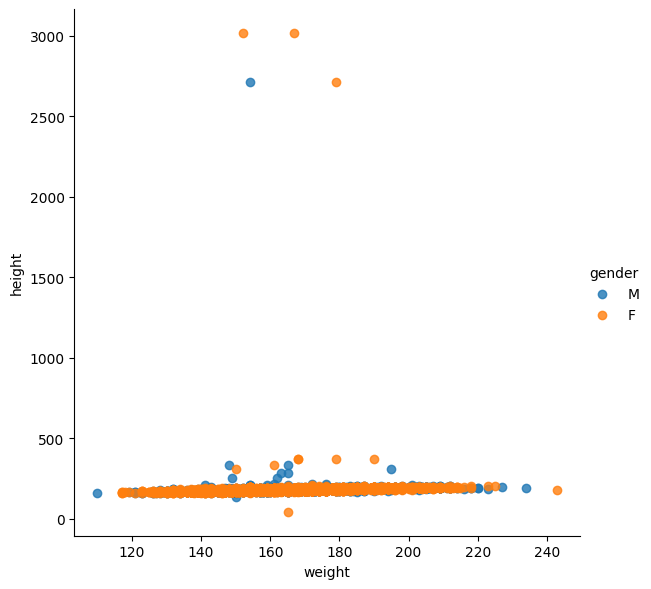

In [131]:
# Some stats viz after preprocessing

#to check weights and heights of males and females

sns.lmplot(x='weight', y='height', hue='gender', data=train_df, fit_reg=False, height=6)
py.show()

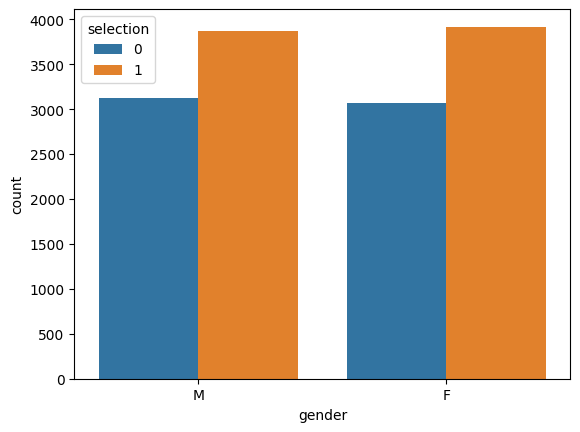

In [134]:
#Exploratory Data Analysis
#Now lets try to find correlation of features with the target

#correlation between ball_controlling_skills  with target


sns.countplot(x='gender', hue='selection', data=train_df)
py.show()

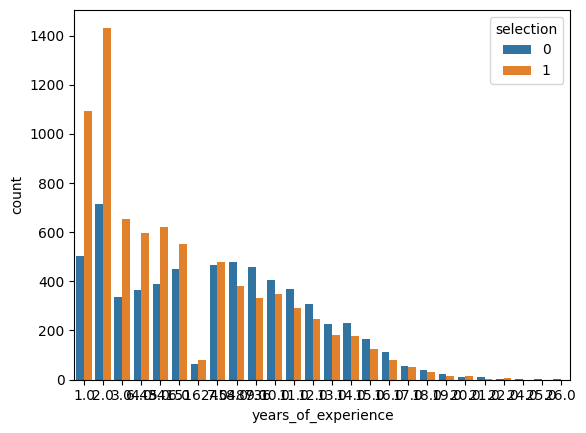

In [137]:
sns.countplot(x='years_of_experience', hue='selection', data=train_df)
py.show()

In [140]:
# I can drop few features but done any cooreelaton test for now will continue and features and label encode the Categorical features
# Can do One Hot encoding but stick with Label Encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [141]:
for column in train_df.select_dtypes(include='object').columns:
    train_df[column] = label_encoder.fit_transform(train_df[column])

C:\Users\93856\AppData\Local\Temp\ipykernel_13328\1694534561.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[column] = label_encoder.fit_transform(train_df[column])


In [143]:
train_df.dtypes

player_id                      int32
name                           int32
age                            int64
gender                         int32
country                        int32
height                       float64
weight                         int32
ball_controlling_skills      float64
body_reflexes                float64
body_balance                 float64
jumping_skills               float64
penalties_conversion_rate    float64
mental_strength              float64
goalkeeping_skills           float64
defending_skills             float64
passing_skills               float64
dribbling_skills             float64
shot_accuracy                float64
body_strength_stamina        float64
max_running_speed            float64
strong_foot                    int32
behaviour_rating             float64
matches_played               float64
fitness_rating               float64
trophies_won                 float64
dedication_level               int32
coaching                       int32
y

In [149]:
X = train_df.drop(['selection'], axis=1)
y = train_df['selection']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=2)

In [150]:

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [151]:
#Check length of train set 

len(X_train)

12577

In [156]:
len(X_test)

1398

In [160]:
#Model Selection

#As of know i have done the data cleaning,removing outliers,feature enginering and selction.
# Now i will use different classification algorithms for predicting the disease.

#Ensembling Technique Random forest

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100)
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [161]:
#Now test with classifier y_pred

y_pred= classifier.predict(X_test)

In [162]:
# Now the evaluation of the randomforest model
#To check the accuracy and Confusion matrix

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))


[[510 120]
 [114 654]]


In [163]:
#checking accuracy of the model

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8326180257510729

In [164]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.81      0.81       630
           1       0.84      0.85      0.85       768

    accuracy                           0.83      1398
   macro avg       0.83      0.83      0.83      1398
weighted avg       0.83      0.83      0.83      1398



In [165]:
#using Support vector machines

from sklearn.svm import SVC
svc = SVC(gamma='auto')
svc.fit(X_train, y_train)

SVC(gamma='auto')

In [166]:
y_pred_svc = svc.predict(X_test)

In [167]:
# SVM Model Evaluation
print(confusion_matrix(y_test, y_pred_svc))
print(classification_report(y_test, y_pred_svc))

[[493 137]
 [127 641]]
              precision    recall  f1-score   support

           0       0.80      0.78      0.79       630
           1       0.82      0.83      0.83       768

    accuracy                           0.81      1398
   macro avg       0.81      0.81      0.81      1398
weighted avg       0.81      0.81      0.81      1398



In [178]:
test_df.isnull().sum()

player_id                      0
name                           0
age                            0
gender                        20
country                        0
height                         0
weight                       271
ball_controlling_skills      270
body_reflexes                  0
body_balance                   0
jumping_skills                22
penalties_conversion_rate     16
mental_strength               18
goalkeeping_skills             0
defending_skills               0
passing_skills                 0
dribbling_skills               0
shot_accuracy                342
body_strength_stamina          0
max_running_speed              0
strong_foot                  378
behaviour_rating             442
matches_played               471
fitness_rating               438
trophies_won                   0
dedication_level               0
coaching                      87
years_of_experience           89
no_of_disqualifications        0
dtype: int64

In [180]:
num_cols_test = test_df.select_dtypes(include='number').columns
num_cols_test

Index(['age', 'ball_controlling_skills', 'body_reflexes', 'body_balance',
       'jumping_skills', 'penalties_conversion_rate', 'mental_strength',
       'goalkeeping_skills', 'defending_skills', 'passing_skills',
       'dribbling_skills', 'shot_accuracy', 'body_strength_stamina',
       'max_running_speed', 'behaviour_rating', 'matches_played',
       'fitness_rating', 'trophies_won', 'years_of_experience',
       'no_of_disqualifications'],
      dtype='object')

In [184]:
test_df[num_cols_test] = test_df[num_cols_test].fillna(train_df[num_cols_test].mean())

In [186]:
test_df

,player_id,name,age,gender,country,height,weight,ball_controlling_skills,body_reflexes,body_balance,...,max_running_speed,strong_foot,behaviour_rating,matches_played,fitness_rating,trophies_won,dedication_level,coaching,years_of_experience,no_of_disqualifications
0,PLID_14644,Ha Matta,23.0,F,Austria,6'1,163lbs,77.0,58.0,47.0,...,24.4,Right,7.700000,3.908463,8.100000,2.0,Medium,Unknown,8.0,0.0
1,PLID_5934,Rex Weinstock,18.0,F,South Africa,5'9,170lbs,54.0,69.0,70.0,...,22.6,Right,5.300000,0.000000,6.405482,3.0,Medium,Academy,3.0,0.0
2,PLID_5074,Raisa Angeles,16.0,F,Netherlands,5'10,154lbs,34.0,43.0,45.0,...,23.2,Left,4.700000,0.000000,6.600000,5.0,Medium,Academy,2.0,0.0
3,PLID_17357,Jong Flewelling,27.0,F,China PR,6'0,168lbs,79.0,73.0,76.0,...,21.2,Right,8.600000,113.000000,8.600000,6.0,High,Academy,13.0,16.0
4,PLID_13993,Dian Westmoreland,19.0,F,Australia,6'0,163lbs,47.0,61.0,74.0,...,23.4,Right,5.822068,0.000000,5.700000,5.0,Medium,Talent Hunt,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9325,PLID_7718,Dorine Brehmer,18.0,F,England,6'3,172lbs,19.0,36.0,58.0,...,16.1,Right,5.100000,1.000000,4.400000,2.0,High,Talent Hunt,4.0,0.0
9326,PLID_1563,Teri Puente,23.0,M,Belgium,6'3,169lbs,74.0,63.0,45.0,...,23.4,Right,6.600000,39.000000,8.000000,5.0,Medium,Academy,9.0,6.0
9327,PLID_6017,Gertrud Aleshire,16.0,M,South Africa,5'10,154lbs,52.0,75.0,68.0,...,27.2,Any,4.400000,0.000000,6.800000,3.0,Medium,Academy,1.0,0.0
9328,PLID_9370,Chantel Corum,16.0,M,Italy,6'0,165lbs,47.0,44.0,53.0,...,21.9,NaN,4.700000,0.000000,6.400000,4.0,Medium,Academy,2.0,0.0


In [187]:
category_cols_test = test_df.select_dtypes(include='object').columns
test_df[category_cols_test] = test_df[category_cols_test].apply(lambda x: x.fillna(x.value_counts().idxmax()))

In [188]:
test_df['weight'] = test_df['weight'].str.extract('(\d+)').astype(int)
test_df['height'] = test_df['height'].apply(convert_to_cm)
test_df['bmi'] = test_df.apply(BMI, axis=1)

In [190]:
for column in test_df.select_dtypes(include='object').columns:
    test_df[column] = label_encoder.fit_transform(test_df[column])

In [197]:
test_set = np.array(test_df)

numpy.ndarray

In [200]:

sc_y = StandardScaler()
test_ = sc_y.fit_transform(test_set)


player_id                      int32
name                           int32
age                          float64
gender                         int32
country                        int32
height                       float64
weight                         int32
ball_controlling_skills      float64
body_reflexes                float64
body_balance                 float64
jumping_skills               float64
penalties_conversion_rate    float64
mental_strength              float64
goalkeeping_skills           float64
defending_skills             float64
passing_skills               float64
dribbling_skills             float64
shot_accuracy                float64
body_strength_stamina        float64
max_running_speed            float64
strong_foot                    int32
behaviour_rating             float64
matches_played               float64
fitness_rating               float64
trophies_won                 float64
dedication_level               int32
coaching                       int32
y

In [202]:
test_df['selection'] = classifier.predict(test_)

In [204]:
test_df.to_csv('classification_submission.csv')